In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.tokenize import RegexpTokenizer
from nltk import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from pylab import rcParams
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from itertools import chain
import pandas as pd
from nltk import word_tokenize, ngrams
from nltk import FreqDist
from nltk.corpus import stopwords 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Preprocessing

Steps to preprocessing 
1. Tokenizing 
2. Regular Expressions 
3. Lemmatizing/Stemming 

In [7]:
df = pd.read_csv("dataset/combined_final.csv")

In [8]:
df.head()

,Unnamed: 0,title,subreddit,author,subreddit_id,id,comments,combined_title_&_comment
0,0,Mulvaney acknowledges Ukraine aid was withheld...,Liberal,first52,t5_2qxt5,djdfhm,NaN,Mulvaney acknowledges Ukraine aid was withheld...
1,1,"I have concerns about trump ""hosting"" the G7 a...",Liberal,djinnisequoia,t5_2qxt5,djdeoe,NaN,"I have concerns about trump ""hosting"" the G7 a..."
2,2,Swing district Democrats build on cash advanta...,Liberal,Bobsind,t5_2qxt5,djbsw2,NaN,Swing district Democrats build on cash advanta...
3,3,Climate crisis will not be discussed at G7 nex...,Liberal,spaceghoti,t5_2qxt5,djay3y,NaN,Climate crisis will not be discussed at G7 nex...
4,4,California cannabis king linked to Ukrainian w...,Liberal,StardustSpinner,t5_2qxt5,djaxo7,Here is another story about the same character...,California cannabis king linked to Ukrainian w...


## Quick Clean- Converting Liberal and Conservative to integers 

In [9]:
df['subred_numeric'] = df['subreddit'].map({'Liberal': 0, "Conservative": 1})

## Regular Expressions 

In [10]:
tokenizer = RegexpTokenizer(r'\w+')

In [11]:
def tokenize(x): 
    return tokenizer.tokenize(x)

df['tokens'] = df['combined_title_&_comment'].map(tokenize)

## Creating Cameron Inspired Features for the Dataframe 

In [12]:
#creates a column listing the number of words in the string 
df['num_words']= df['tokens'].map(len)

In [13]:
#creates a column listing the average number of words in the token 
df['average_word_len'] = df['tokens'].map(lambda title: np.mean([len(word) for word in title]))

/Users/nathan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nathan/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Lemmatizing and Stemming 

In [14]:
lemmatizer = WordNetLemmatizer()

In [15]:
#creating functions for stemming and lemmatizing 
def stemmer(x): 
    stemmer = PorterStemmer()
    return ' '.join([stemmer.stem(word) for word in x])
def lemmatize(x):
    lemmatizer = WordNetLemmatizer()
    return' '.join([lemmatizer.lemmatize(word) for word in x])

In [16]:
df['lems'] = df['tokens'].map(lemmatize)
df['stems'] = df['tokens'].map(stemmer)

## Sentiment Analysis 

In [17]:
sia = SIA()

In [18]:
#converting the sentiment analyzer data into dataframe then concating them
pol_score = []
def sentiment_analyzer(x):
    
    for i in range(df.shape[0]): 
        title = df['title'].iloc[i]
        sentiment = sia.polarity_scores(title)
        print(sentiment)
        pol_score.append(sentiment)
    return pol_score


In [19]:
sentiment_analyzer(df)

{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.25}
{'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'compound': -0.6249}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.25}
{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.5859}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.238, 'neu': 0.762, 'pos': 0.0, 'compound': -0.3612}
{'neg': 0.315, 'neu': 0.685, 'pos': 0.0, 'compound': -0.7096}
{'neg': 0.16, 'neu': 0.84, 'p

{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.765}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'compound': -0.25}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'compound': 0.5106}
{'neg': 0.329, 'neu': 0.671, 'pos': 0.0, 'compound': -0.7061}
{'neg': 0.197, 'neu': 0.592, 'pos': 0.21, 'compound': 0.0498}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}
{'neg': 0.152, 'neu': 0.667, 'pos': 0.181, 'compound': 0.0772}
{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'compound': 0.9664}
{'neg': 0.094, 'neu': 0.58, 'pos': 0.326, 'compound': 0.7506}
{'neg': 0.295, 'neu': 0.705, 'pos': 0.0, 'compound': -0.6808}
{'neg': 0.16, 'neu': 0.84, 'pos': 0.0, 'compound': -0.2732}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'compound': 0.187

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.4767}
{'neg': 0.178, 'neu': 0.822, 'pos': 0.0, 'compound': -0.3818}
{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.4215}
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.5574}
{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.4588}
{'neg': 0.236, 'neu': 0.764, 'pos': 0.0, 'compound': -0.5719}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.313, 'neu': 0.687, 'pos': 0.0, 'compound': -0.6249}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.3612}
{'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.5106}
{'neg': 0.35, 'neu': 0.562, 'pos': 0.087, 'compound': -0.6369}
{'neg': 0.101, 'neu': 0.725, 'pos': 0.174, 'compound': 0.25}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compo

[{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.25},
 {'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'compound': -0.6249},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.25},
 {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.5859},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.238, 'neu': 0.762, 'pos': 0.0, 'compound': -0.3612},
 {'neg': 0.315, 'neu': 0.685, 'pos': 0.0, 'compound': -0.70

In [20]:
senti_df = pd.DataFrame.from_records(pol_score)

In [21]:
senti_df

,neg,neu,pos,compound
0,0.000,0.769,0.231,0.4019
1,0.000,1.000,0.000,0.0000
2,0.000,0.818,0.182,0.2500
3,0.255,0.745,0.000,-0.6249
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
1995,0.187,0.685,0.128,-0.3164
1996,0.256,0.674,0.070,-0.9286
1997,0.400,0.600,0.000,-0.6124
1998,0.113,0.887,0.000,-0.1027


## Combining Data into one DataFrame

In [22]:
df = pd.concat([df, senti_df], axis =1, sort = False)

In [23]:
df.head(-1)

,Unnamed: 0,title,subreddit,author,subreddit_id,id,comments,combined_title_&_comment,subred_numeric,tokens,num_words,average_word_len,lems,stems,neg,neu,pos,compound
0,0,Mulvaney acknowledges Ukraine aid was withheld...,Liberal,first52,t5_2qxt5,djdfhm,NaN,Mulvaney acknowledges Ukraine aid was withheld...,0,"[Mulvaney, acknowledges, Ukraine, aid, was, wi...",10,6.200000,Mulvaney acknowledges Ukraine aid wa withheld ...,mulvaney acknowledg ukrain aid wa withheld to ...,0.000,0.769,0.231,0.4019
1,1,"I have concerns about trump ""hosting"" the G7 a...",Liberal,djinnisequoia,t5_2qxt5,djdeoe,NaN,"I have concerns about trump ""hosting"" the G7 a...",0,"[I, have, concerns, about, trump, hosting, the...",14,4.357143,I have concern about trump hosting the G7 at D...,I have concern about trump host the G7 at dora...,0.000,1.000,0.000,0.0000
2,2,Swing district Democrats build on cash advanta...,Liberal,Bobsind,t5_2qxt5,djbsw2,NaN,Swing district Democrats build on cash advanta...,0,"[Swing, district, Democrats, build, on, cash, ...",10,6.100000,Swing district Democrats build on cash advanta...,swing district democrat build on cash advantag...,0.000,0.818,0.182,0.2500
3,3,Climate crisis will not be discussed at G7 nex...,Liberal,spaceghoti,t5_2qxt5,djay3y,NaN,Climate crisis will not be discussed at G7 nex...,0,"[Climate, crisis, will, not, be, discussed, at...",13,4.615385,Climate crisis will not be discussed at G7 nex...,climat crisi will not be discuss at G7 next ye...,0.255,0.745,0.000,-0.6249
4,4,California cannabis king linked to Ukrainian w...,Liberal,StardustSpinner,t5_2qxt5,djaxo7,Here is another story about the same character...,California cannabis king linked to Ukrainian w...,0,"[California, cannabis, king, linked, to, Ukrai...",68,5.000000,California cannabis king linked to Ukrainian w...,california cannabi king link to ukrainian who ...,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,994,Respect our troops.,Conservative,yallmindifipraise,t5_2qh6p,dhhice,NaN,Respect our troops.,1,"[Respect, our, troops]",3,5.333333,Respect our troop,respect our troop,0.000,0.392,0.608,0.4767
1995,995,Mr.Trump choose your words wisely! backstabbin...,Conservative,lRevenant,t5_2qh6p,dhh4dm,NaN,Mr.Trump choose your words wisely! backstabbin...,1,"[Mr, Trump, choose, your, words, wisely, backs...",19,4.578947,Mr Trump choose your word wisely backstabbing ...,Mr trump choos your word wise backstab and bet...,0.187,0.685,0.128,-0.3164
1996,996,The siblings of an ARMED robber who was shot a...,Conservative,optionhome,t5_2qh6p,dhh4ai,What she failed to understand is that most peo...,The siblings of an ARMED robber who was shot a...,1,"[The, siblings, of, an, ARMED, robber, who, wa...",989,4.047523,The sibling of an ARMED robber who wa shot and...,the sibl of an arm robber who wa shot and kill...,0.256,0.674,0.070,-0.9286
1997,997,Remind me again how Trump is racist?,Conservative,reddeadfish,t5_2qh6p,dhh48i,NaN,Remind me again how Trump is racist?,1,"[Remind, me, again, how, Trump, is, racist]",7,4.142857,Remind me again how Trump is racist,remind me again how trump is racist,0.400,0.600,0.000,-0.6124


## Getting the Sentiment Score 

In [24]:
df['sent_score'] = 0 
df.loc[df['compound'] > 0.2, 'sent_score'] = 1 
df.loc[df['compound'] < -0.2, 'sent_score'] = -1


In order to explore the data, I couldn't keep the positive and negatives as floats. Therefore I decided to convert it into whole numbers based on compound score thresholds. 


### Exploring Sentiment Scores and Subreddits 

In [25]:
print(df.sent_score.value_counts(normalize = True))

 0    0.4450
-1    0.3295
 1    0.2255
Name: sent_score, dtype: float64


In [26]:
df.head()

,Unnamed: 0,title,subreddit,author,subreddit_id,id,comments,combined_title_&_comment,subred_numeric,tokens,num_words,average_word_len,lems,stems,neg,neu,pos,compound,sent_score
0,0,Mulvaney acknowledges Ukraine aid was withheld...,Liberal,first52,t5_2qxt5,djdfhm,NaN,Mulvaney acknowledges Ukraine aid was withheld...,0,"[Mulvaney, acknowledges, Ukraine, aid, was, wi...",10,6.200000,Mulvaney acknowledges Ukraine aid wa withheld ...,mulvaney acknowledg ukrain aid wa withheld to ...,0.000,0.769,0.231,0.4019,1
1,1,"I have concerns about trump ""hosting"" the G7 a...",Liberal,djinnisequoia,t5_2qxt5,djdeoe,NaN,"I have concerns about trump ""hosting"" the G7 a...",0,"[I, have, concerns, about, trump, hosting, the...",14,4.357143,I have concern about trump hosting the G7 at D...,I have concern about trump host the G7 at dora...,0.000,1.000,0.000,0.0000,0
2,2,Swing district Democrats build on cash advanta...,Liberal,Bobsind,t5_2qxt5,djbsw2,NaN,Swing district Democrats build on cash advanta...,0,"[Swing, district, Democrats, build, on, cash, ...",10,6.100000,Swing district Democrats build on cash advanta...,swing district democrat build on cash advantag...,0.000,0.818,0.182,0.2500,1
3,3,Climate crisis will not be discussed at G7 nex...,Liberal,spaceghoti,t5_2qxt5,djay3y,NaN,Climate crisis will not be discussed at G7 nex...,0,"[Climate, crisis, will, not, be, discussed, at...",13,4.615385,Climate crisis will not be discussed at G7 nex...,climat crisi will not be discuss at G7 next ye...,0.255,0.745,0.000,-0.6249,-1
4,4,California cannabis king linked to Ukrainian w...,Liberal,StardustSpinner,t5_2qxt5,djaxo7,Here is another story about the same character...,California cannabis king linked to Ukrainian w...,0,"[California, cannabis, king, linked, to, Ukrai...",68,5.000000,California cannabis king linked to Ukrainian w...,california cannabi king link to ukrainian who ...,0.000,1.000,0.000,0.0000,0


In [27]:
scores =df['sent_score'].value_counts(normalize = True)

## Exploring Token Count 

In this section I am trying to find the most unique "non-filler" words within the dataset. The cell below is an accumulation of my efforts to find the most interesting words for the variable freq_tokens_total. I am mostly looking for nouns or strong adjectives. 

In [31]:
 more_stop_words = ['people','like', 'would',
                    'get', 'one', 'right', 'think', 'say',
                    'want', 'make', 'need', 'know', 
                    'thing', 'even', 'going', 'go', 'see',
                   'time', 'really', 'much', 'could',
                   'http', 'way', 'u','still', 'well', 'said',
                   'also']

In [32]:
# I ran the initial frequency distribution and it outputed a lot of words that really didn't fit the criteria
stop_words=stopwords.words('english') + more_stop_words

In [33]:
# I'm using this function to remove punctuation from the lems and making them lower case.
# The list comprehension also removes stopwords froms toks 
def text_processor(x): 
    tokens = []
    
    for var in x: 
        toks = tokenizer.tokenize(var)
        toks = [y.lower() for y in toks if y.lower() not in stop_words]
        tokens+= toks 
    return tokens 

In [34]:
tokens = text_processor(df['lems'])

In [35]:
freq_tokens_total =FreqDist(tokens)


In [100]:
freq_total=freq_tokens_total.most_common(20)

In [131]:
freq_total

[('trump', 1342),
 ('wa', 852),
 ('ha', 543),
 ('president', 298),
 ('year', 267),
 ('conservative', 254),
 ('vote', 247),
 ('good', 229),
 ('tax', 222),
 ('liberal', 218),
 ('left', 215),
 ('gun', 207),
 ('news', 203),
 ('take', 202),
 ('racist', 189),
 ('biden', 187),
 ('government', 187),
 ('democrats', 186),
 ('money', 181),
 ('never', 179)]

#### Sentiment Counter 
I created the column sent score as a way to effectively measure the sentiment of the post. This function inputs the desired subreddit, the sentiment score, and the dataframe and returns the most common words for that parameter 

In [38]:

def sentiment_counter(subreddit, n, df): 
    sent_df = df.loc[(df['subreddit'] == subreddit) & (df['sent_score'] == n)]
    x = text_processor(sent_df['lems'])
    freq_dist = FreqDist(x)
    return freq_dist.most_common(20)

In [39]:
pos_cons_freq = sentiment_counter("Conservative", 1, df)

In [40]:
pos_lib_freq = sentiment_counter("Liberal", 1, df)

In [42]:
neg_cons_freq = sentiment_counter("Conservative", -1, df)

In [43]:
neg_lib_freq = sentiment_counter("Liberal", -1, df)

#### Count Getter Function 


In [93]:
def count_getter (listtt): 
    x_list = []
    y_list = []
    
    for x in listtt: 
        for y in x: 
            if type(y) == int: 
                y_list.append(y)
            
            elif type(y) == str:
                    x_list.append(y)
            else: 
                continue
    return x_list, y_list

In [97]:
x_neg_lib, y_neg_lib = count_getter(neg_lib_freq)

In [95]:
x_neg_con, y_neg_con = count_getter(neg_cons_freq)

In [98]:
x_pos_lib, y_pos_lib = count_getter(pos_lib_freq)

In [99]:
x_pos_con, y_pos_con = count_getter(pos_cons_freq)

In [101]:
x_total_freq, y_total_freq = count_getter(freq_total)

['trump',
 'wa',
 'racist',
 'ha',
 'gun',
 'president',
 'republican',
 'white',
 'law',
 'support',
 'com',
 'every',
 'republicans',
 'year',
 'believe',
 'tax',
 'shooting',
 'war',
 'many',
 'country']

## Graphing 

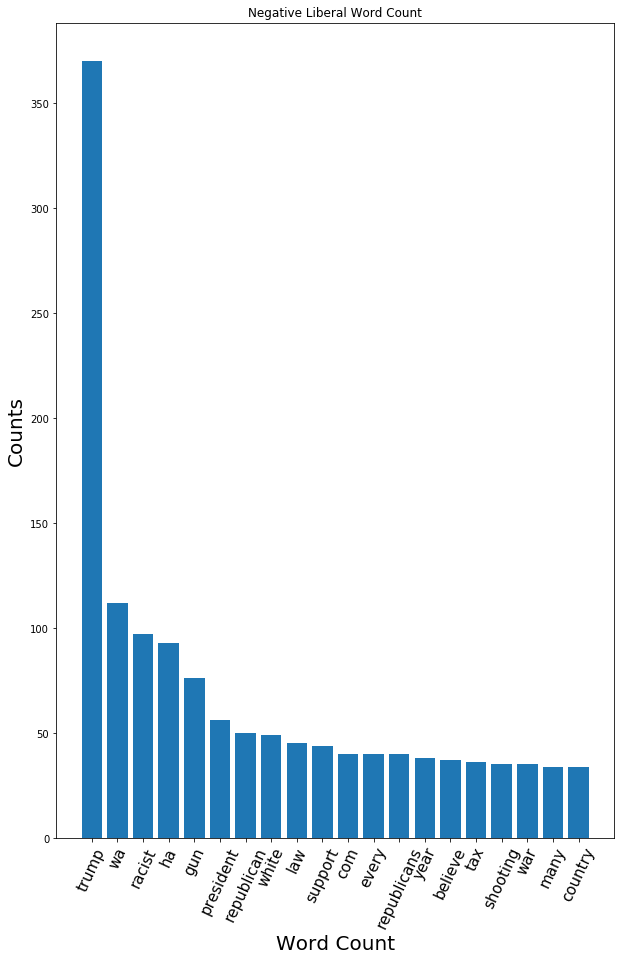

In [130]:

index = np.arange(len(x_neg_lib))
plt.bar(x_neg_lib, y_neg_lib)
plt.xlabel('Word Count', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.xticks(index, x_neg_lib, fontsize=15, rotation=65)
plt.title('Negative Liberal Word Count')
rcParams['figure.figsize'] = 10, 15
plt.show()


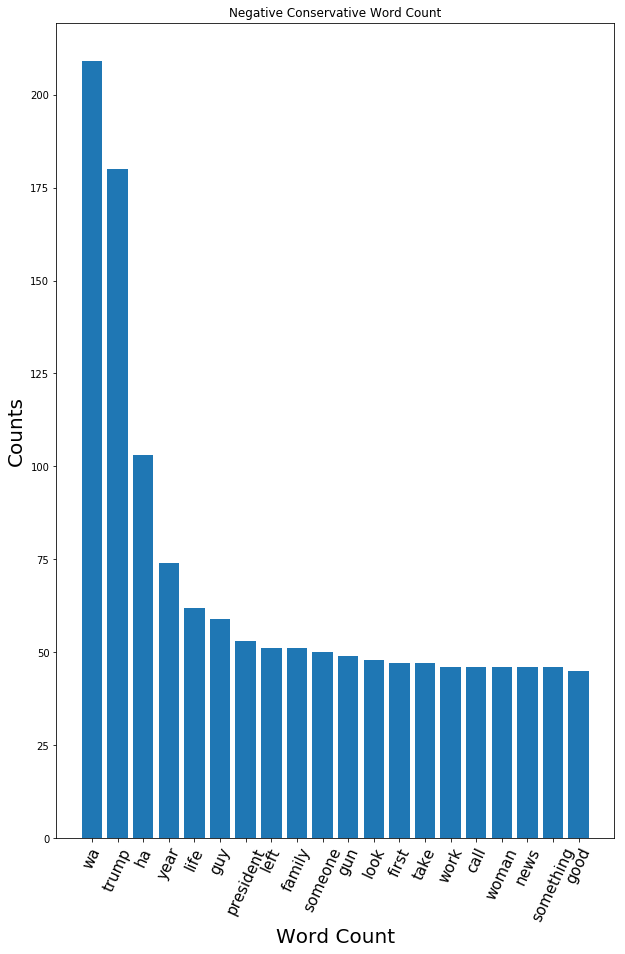

In [129]:
index = np.arange(len(x_neg_con))
plt.bar(x_neg_con, y_neg_con)
plt.xlabel('Word Count', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.xticks(index, x_neg_con, fontsize=15, rotation=65)
plt.title('Negative Conservative Word Count')
rcParams['figure.figsize'] = 10, 15
plt.show()


## Converting Data into CSV

In [459]:
df.to_csv('final_data.csv', index = False)